# EDA Process

In this notebook we are going to do the exploratory data analysis of the csv that were loaded from the API in the former notebook

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_columns', None)         #you can turn on this options to see the full dataframe
#pd.set_option('display.max_rows', None)
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Now the files

Frontpage files

In [2]:
a_df_access_broadband_narrowband = pd.read_csv("Page_Datasets/access_broadband_narrowband.csv")
b_df_access_fixed_internet_by_dowload_local = pd.read_csv("Page_Datasets/access_fixed_internet_by_dowload_local.csv")
c_df_access_fixed_internet_by_tecnology_local = pd.read_csv("Page_Datasets/access_fixed_internet_by_tecnology_local.csv")
d_df_access_fixed_internet_byprovince = pd.read_csv("Page_Datasets/access_fixed_internet_byprovince.csv")
e_df_dowload_speed_byprovince = pd.read_csv("Page_Datasets/dowload_speed_byprovince.csv")
f_df_fixed_internet_by_tech = pd.read_csv("Page_Datasets/fixed_internet_by_tech.csv")
g_df_internet_access_byspeed_download1 = pd.read_csv("Page_Datasets/internet_access_byspeed_download1.csv")
h_df_internet_access_byspeed_download2 = pd.read_csv("Page_Datasets/internet_access_byspeed_download2.csv")
i_df_internet_penetration = pd.read_csv("Page_Datasets/internet_penetration.csv")
j_df_localities_internet_access = pd.read_csv("Page_Datasets/localities_internet_access.csv")
k_df_median_download_fixed_internet = pd.read_csv("Page_Datasets/median_download_fixed_internet.csv")
m_df_national_access_by_fixed_internet = pd.read_csv("Page_Datasets/national_access_by_fixed_internet.csv")
n_df_national_internet_access = pd.read_csv("Page_Datasets/national_internet_access.csv")
o_df_penetration_by_national_home = pd.read_csv("Page_Datasets/penetration_by_national_home.csv")
p_df_profits_trimestrer_fixed_internet = pd.read_csv("Page_Datasets/profits_trimestrer_fixed_internet.csv")

Source files

In [3]:
df_internet_access_by_speed_local = pd.read_excel("Source_Datasets/internet_access_by_speed_local.xlsx")
df_internet_access_by_speed_province = pd.read_excel("Source_Datasets/internet_access_by_speed_province.xlsx")
df_internet_access_by_speed = pd.read_excel("Source_Datasets/internet_access_by_speed.xlsx")
df_internet_access_by_tech_local = pd.read_excel("Source_Datasets/internet_access_by_tech_local.xlsx")
df_internet_access_by_tech = pd.read_excel("Source_Datasets/internet_access_by_tech.xlsx")
df_internet_BAF = pd.read_excel("Source_Datasets/internet_BAF.xlsx")
df_internet_conect_map = pd.read_excel("Source_Datasets/internet_conect_map.xlsx")
df_internet_gains = pd.read_excel("Source_Datasets/internet_gains.xlsx")
df_internet_penetration = pd.read_excel("Source_Datasets/internet_penetration.xlsx")
df_internet_speed_hist = pd.read_excel("Source_Datasets/internet_speed_hist.xlsx")

## Now we look at the dataframes, one by one

In [4]:
a_df_access_broadband_narrowband.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [5]:
a_df_access_broadband_narrowband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


We see that this df has no nulls

In [6]:
a_df_access_broadband_narrowband.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


For Banda ancha and Dial up and Banda ancha fija columns the mean and the median are not the same, so there are outliers to search or the data is very disperse. We will use a scatter to look that

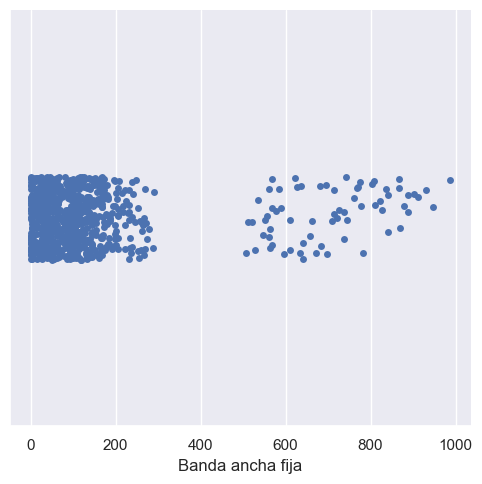

In [7]:
sns.catplot(data=a_df_access_broadband_narrowband, x = "Banda ancha fija")

Most of the values are under 400. We will see the values over that values and there is big gap between 300 and 500, we see a number of outliers after that value

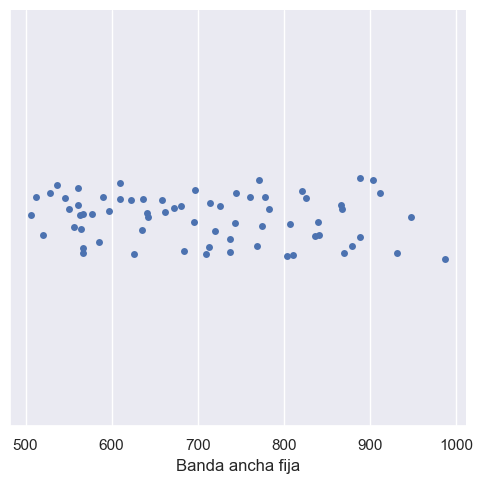

In [8]:
over = a_df_access_broadband_narrowband["Banda ancha fija"] > 400
over = a_df_access_broadband_narrowband[over]
sns.catplot(data=over, x = "Banda ancha fija")

The outliers are dispersed but no particular trend is seen

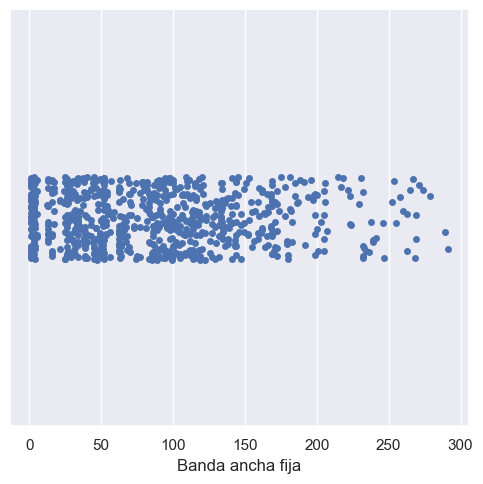

In [9]:
under = a_df_access_broadband_narrowband["Banda ancha fija"] < 400
under = a_df_access_broadband_narrowband[under]
sns.catplot(data=under, x = "Banda ancha fija")

Here you can see that most values between, under 400, are under 150 too, so majority of the number of access by quarter and province are under that value.

Let's see what is happening with Dial Up

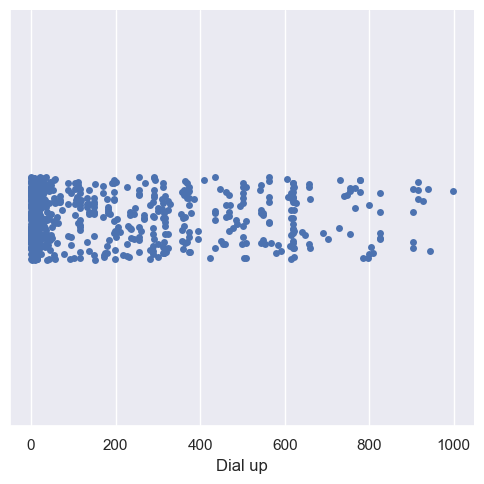

In [10]:
sns.catplot(data=a_df_access_broadband_narrowband, x = "Dial up")

You see a lot of values are under 200, and then, under 50

In [11]:
a_df_access_broadband_narrowband.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


Something weird to this dataframes is this, the unit number does not seems to be correct, since 5 + 6 is not 5, and is not the only one

In [12]:
d_df_access_fixed_internet_byprovince.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


In [13]:
f_df_fixed_internet_by_tech.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [14]:
n_df_national_internet_access.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


Same here and, since in the web page is not clear what unit numbers are this (millions? hundreds? thousends?), we decided to look at the source datasets were this came from. 

Some of them are the same, but the source one are more complete, or the data is better shaped in the original. Some examples:

In [15]:
df_internet_penetration.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.72
1,2022,4,Capital Federal,50.35
2,2022,4,Catamarca,16.73
3,2022,4,Chaco,11.66
4,2022,4,Chubut,26.23


In [16]:
i_df_internet_penetration.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


The decimal numbers are with "." instead of ",", which is better to work with in code

In [17]:
df_internet_access_by_speed_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [18]:
b_df_access_fixed_internet_by_dowload_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


The second is more complete, since it covers more range of speed internet

In some cases, some of the are simplily a result of the source, with media in this case

In [19]:
df_internet_access_by_speed_province.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
e_df_dowload_speed_byprovince.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592


For all this reasons, we decided to use the source material, if it's needed for some analysis we will use the frompage derived csv, but mainly we will use the source xlsx transformed to dataframes archives

Let's see the first one

In [21]:
df_internet_access_by_speed_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Okay, some of them have NaN values, we have to replace them with 0, because their represent that no one has that speed connection

In [22]:
df_internet_access_by_speed_local.fillna(value=0, inplace= True)

In [23]:
columns = df_internet_access_by_speed_local.columns
for column in columns:
    
    print(column)

Provincia
Partido
Localidad
Link Indec
Otros
0,256 Mbps
0,375 Mbps
0,5 Mbps
0,512 Mbps
0,625 Mbps
0,75 Mbps
1 Mbps
1,25 Mbps
1,5 Mbps
2 Mbps
2,2 Mbps
2,5 Mbps
3 Mbps
3,3 Mbps
3,5 Mbps
4 Mbps
4,5 Mbps
5 Mbps
6 Mbps
6,4 Mbps
7 Mbps
7,5 Mbps
8 Mbps
9 Mbps
10 Mbps
10,2 Mbps
11 Mbps
12 Mbps
12,3 Mbps
13 Mbps
14 Mbps
15 Mbps
16 Mbps
17 Mbps
18 Mbps
20 Mbps
20,5 Mbps
21 Mbps
22 Mbps
23 Mbps
24 Mbps
25 Mbps
25,1 Mbps
25,5 Mbps
26 Mbps
27 Mbps
30 Mbps
31 Mbps
32 Mbps
34 Mbps
35 Mbps
36 Mbps
38 Mbps
39 Mbps
40 Mbps
41 Mbps
45 Mbps
46 Mbps
48 Mbps
49 Mbps
50 Mbps
50,1 Mbps
50,25 Mbps
51 Mbps
55 Mbps
58 Mbps
59 Mbps
60 Mbps
61 Mbps
62 Mbps
64 Mbps
65 Mbps
66 Mbps
70 Mbps
75 Mbps
78 Mbps
80 Mbps
83 Mbps
85 Mbps
90 Mbps
92 Mbps
95 Mbps
100 Mbps
100,25 Mbps
110 Mbps
120 Mbps
122 Mbps
125 Mbps
126 Mbps
130 Mbps
140 Mbps
150 Mbps
157 Mbps
158 Mbps
160 Mbps
164 Mbps
165 Mbps
180 Mbps
200 Mbps
212 Mbps
220 Mbps
225 Mbps
234 Mbps
240 Mbps
250 Mbps
256 Mbps
275 Mbps
300 Mbps
320 Mbps
325 Mbps
330 Mbps
340 

We have a lot columns, so it will be difficult to graphicate them, so we will make new colunms 

In [24]:
df_internet_access_by_speed_local['less than 1 Mbps'] = df_internet_access_by_speed_local[["0,256 Mbps","0,375 Mbps",
                                                                                           "0,5 Mbps","0,512 Mbps",
                                                                                           "0,625 Mbps","0,75 Mbps"]].sum(axis = 1)

Let's see if our code works properly

In [25]:
mask = df_internet_access_by_speed_local["Localidad"] == "25 de Mayo" 
mask = df_internet_access_by_speed_local[mask]
mask[["0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps","less than 1 Mbps"]]

,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps","0,75 Mbps",less than 1 Mbps
0,0.0,0.0,2.0,0.0,0.0,19.0,21.0
1724,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,2.0,0.0,0.0,2.0


Works well, so we continue with the process, and delete the non usefull columns

In [26]:
df_internet_access_by_speed_local.drop(["0,256 Mbps","0,375 Mbps","0,5 Mbps",
                                         "0,512 Mbps","0,625 Mbps","0,75 Mbps"], axis = 1, inplace= True)

In [27]:
df_internet_access_by_speed_local["b'ween 1 and 10,2 Mbps"] = df_internet_access_by_speed_local[["1 Mbps","1,25 Mbps",
                                                                                           "1,5 Mbps","2 Mbps",
                                                                                           "2,2 Mbps",
                                                                                           "2,5 Mbps","3 Mbps",
                                                                                           "3,3 Mbps","3,5 Mbps",
                                                                                           "4 Mbps","4,5 Mbps","5 Mbps",
                                                                                           "6 Mbps","6,4 Mbps","7 Mbps",
                                                                                           "7,5 Mbps","8 Mbps","9 Mbps",
                                                                                           "10 Mbps","10,2 Mbps"]].sum(axis = 1)

In [28]:
df_internet_access_by_speed_local.drop(["1 Mbps","1,25 Mbps","1,5 Mbps",
                                         "2 Mbps","2,2 Mbps","2,5 Mbps",
                                         "3 Mbps","3,3 Mbps","3,5 Mbps","4 Mbps",
                                         "4,5 Mbps","5 Mbps",
                                        "6 Mbps","6,4 Mbps","7 Mbps",
                                        "7,5 Mbps","8 Mbps","9 Mbps",
                                        "10 Mbps","10,2 Mbps"], axis = 1, inplace= True)

In [29]:
columns = df_internet_access_by_speed_local.columns
for column in columns:
    
    print(column)

Provincia
Partido
Localidad
Link Indec
Otros
11 Mbps
12 Mbps
12,3 Mbps
13 Mbps
14 Mbps
15 Mbps
16 Mbps
17 Mbps
18 Mbps
20 Mbps
20,5 Mbps
21 Mbps
22 Mbps
23 Mbps
24 Mbps
25 Mbps
25,1 Mbps
25,5 Mbps
26 Mbps
27 Mbps
30 Mbps
31 Mbps
32 Mbps
34 Mbps
35 Mbps
36 Mbps
38 Mbps
39 Mbps
40 Mbps
41 Mbps
45 Mbps
46 Mbps
48 Mbps
49 Mbps
50 Mbps
50,1 Mbps
50,25 Mbps
51 Mbps
55 Mbps
58 Mbps
59 Mbps
60 Mbps
61 Mbps
62 Mbps
64 Mbps
65 Mbps
66 Mbps
70 Mbps
75 Mbps
78 Mbps
80 Mbps
83 Mbps
85 Mbps
90 Mbps
92 Mbps
95 Mbps
100 Mbps
100,25 Mbps
110 Mbps
120 Mbps
122 Mbps
125 Mbps
126 Mbps
130 Mbps
140 Mbps
150 Mbps
157 Mbps
158 Mbps
160 Mbps
164 Mbps
165 Mbps
180 Mbps
200 Mbps
212 Mbps
220 Mbps
225 Mbps
234 Mbps
240 Mbps
250 Mbps
256 Mbps
275 Mbps
300 Mbps
320 Mbps
325 Mbps
330 Mbps
340 Mbps
400 Mbps
450 Mbps
480 Mbps
500 Mbps
512 Mbps
520 Mbps
540 Mbps
600 Mbps
680 Mbps
700 Mbps
800 Mbps
850 Mbps
900 Mbps
950 Mbps
1000 Mbps
1024 Mbps
Total general
less than 1 Mbps
b'ween 1 and 10,2 Mbps


In [30]:
df_internet_access_by_speed_local["b'ween 11 and 27 Mbps"] = df_internet_access_by_speed_local[["11 Mbps","12 Mbps",
                                                                                              "12,3 Mbps","13 Mbps",
                                                                                              "14 Mbps","15 Mbps",
                                                                                              "16 Mbps","17 Mbps",
                                                                                              "18 Mbps","20 Mbps",
                                                                                              "20,5 Mbps","21 Mbps",
                                                                                              "22 Mbps","23 Mbps","24 Mbps",
                                                                                              "25 Mbps","25,1 Mbps",
                                                                                              "25,5 Mbps","26 Mbps","27 Mbps"]].sum(axis = 1)

In [31]:
df_internet_access_by_speed_local.drop(["11 Mbps","12 Mbps",
                                   "12,3 Mbps","13 Mbps",
                                   "14 Mbps","15 Mbps",
                                   "16 Mbps","17 Mbps",
                                   "18 Mbps","20 Mbps",
                                   "20,5 Mbps","21 Mbps",
                                   "22 Mbps","23 Mbps","24 Mbps",
                                   "25 Mbps","25,1 Mbps",
                                   "25,5 Mbps","26 Mbps","27 Mbps"],axis = 1, inplace= True)

In [32]:
df_internet_access_by_speed_local["b'ween 30 and 58 Mbps"] = df_internet_access_by_speed_local[["30 Mbps","31 Mbps",
                                                                                                "32 Mbps","34 Mbps",
                                                                                                "35 Mbps","36 Mbps",
                                                                                                "38 Mbps","39 Mbps",
                                                                                                "40 Mbps","41 Mbps",
                                                                                                "45 Mbps","46 Mbps",
                                                                                                "48 Mbps","49 Mbps",
                                                                                                "50 Mbps","50,1 Mbps",
                                                                                                "50,25 Mbps","51 Mbps",
                                                                                                "55 Mbps","58 Mbps",]].sum(axis = 1)
df_internet_access_by_speed_local.drop(["30 Mbps","31 Mbps","32 Mbps","34 Mbps","35 Mbps","36 Mbps",
                                        "38 Mbps","39 Mbps","40 Mbps","41 Mbps","45 Mbps","46 Mbps",
                                        "48 Mbps","49 Mbps","50 Mbps","50,1 Mbps","50,25 Mbps","51 Mbps",
                                        "55 Mbps","58 Mbps",], axis = 1, inplace=True)

In [33]:
df_internet_access_by_speed_local["b'ween 59 and 120 Mbps"] = df_internet_access_by_speed_local[["59 Mbps","60 Mbps",
                                                                                                 "61 Mbps","62 Mbps",
                                                                                                 "64 Mbps","65 Mbps",
                                                                                                 "66 Mbps","70 Mbps",
                                                                                                 "75 Mbps","78 Mbps",
                                                                                                 "80 Mbps","83 Mbps",
                                                                                                 "85 Mbps","90 Mbps",
                                                                                                 "92 Mbps","95 Mbps",
                                                                                                 "100 Mbps","100,25 Mbps",
                                                                                                 "110 Mbps","120 Mbps"]].sum(axis =1)
df_internet_access_by_speed_local.drop(["59 Mbps","60 Mbps","61 Mbps","62 Mbps","64 Mbps","65 Mbps",
                                        "66 Mbps","70 Mbps","75 Mbps","78 Mbps","80 Mbps","83 Mbps",
                                        "85 Mbps","90 Mbps","92 Mbps","95 Mbps","100 Mbps",
                                        "100,25 Mbps","110 Mbps","120 Mbps"], axis = 1, inplace=True)

In [34]:
df_internet_access_by_speed_local["b'ween 122 and 256 Mbps"] = df_internet_access_by_speed_local[["122 Mbps","125 Mbps",
                                                                                                  "126 Mbps","130 Mbps",
                                                                                                  "140 Mbps","150 Mbps",
                                                                                                  "157 Mbps","158 Mbps",
                                                                                                  "160 Mbps","164 Mbps",
                                                                                                  "165 Mbps","180 Mbps",
                                                                                                  "200 Mbps","212 Mbps",
                                                                                                  "220 Mbps","225 Mbps",
                                                                                                  "234 Mbps","240 Mbps",
                                                                                                  "250 Mbps","256 Mbps"]].sum(axis = 1)
df_internet_access_by_speed_local.drop(["122 Mbps","125 Mbps","126 Mbps","130 Mbps","140 Mbps","150 Mbps",
                                        "157 Mbps","158 Mbps","160 Mbps","164 Mbps","165 Mbps","180 Mbps",
                                        "200 Mbps","212 Mbps","220 Mbps","225 Mbps","234 Mbps","240 Mbps",
                                        "250 Mbps","256 Mbps"], axis = 1, inplace=True)

In [35]:
df_internet_access_by_speed_local["b'ween 275 and 540 Mbps"] = df_internet_access_by_speed_local[["275 Mbps","300 Mbps","320 Mbps",
                                                                                                  "325 Mbps","330 Mbps",
                                                                                                  "340 Mbps","400 Mbps",
                                                                                                  "450 Mbps","480 Mbps",
                                                                                                  "500 Mbps","512 Mbps",
                                                                                                  "520 Mbps","540 Mbps"]].sum(axis = 1)
df_internet_access_by_speed_local.drop(["275 Mbps","300 Mbps","320 Mbps","325 Mbps","330 Mbps","340 Mbps",
                                        "400 Mbps","450 Mbps","480 Mbps","500 Mbps","512 Mbps",
                                        "520 Mbps","540 Mbps"],axis = 1, inplace=True)

In [36]:
df_internet_access_by_speed_local["b'ween 600 and 1024 Mbps"] = df_internet_access_by_speed_local[["600 Mbps",
                                                                                                  "680 Mbps",
                                                                                                  "700 Mbps",
                                                                                                  "800 Mbps",
                                                                                                  "850 Mbps",
                                                                                                  "900 Mbps",
                                                                                                  "950 Mbps",
                                                                                                  "1000 Mbps",
                                                                                                  "1024 Mbps"]].sum(axis=1)
df_internet_access_by_speed_local.drop(["600 Mbps","680 Mbps","700 Mbps","800 Mbps","850 Mbps","900 Mbps",
                                       "950 Mbps","1000 Mbps","1024 Mbps"], axis = 1, inplace = True)

In [37]:
df_internet_access_by_speed_local.head()

,Provincia,Partido,Localidad,Link Indec,Otros,Total general,less than 1 Mbps,"b'ween 1 and 10,2 Mbps",b'ween 11 and 27 Mbps,b'ween 30 and 58 Mbps,b'ween 59 and 120 Mbps,b'ween 122 and 256 Mbps,b'ween 275 and 540 Mbps,b'ween 600 and 1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,6208.0,21.0,900.0,5141.0,134.0,12.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,59.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,192.0,1.0,191.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,66.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,181.0,0.0,180.0,0.0,0.0,1.0,0.0,0.0,0.0


Now we can do the graphics to see distribution

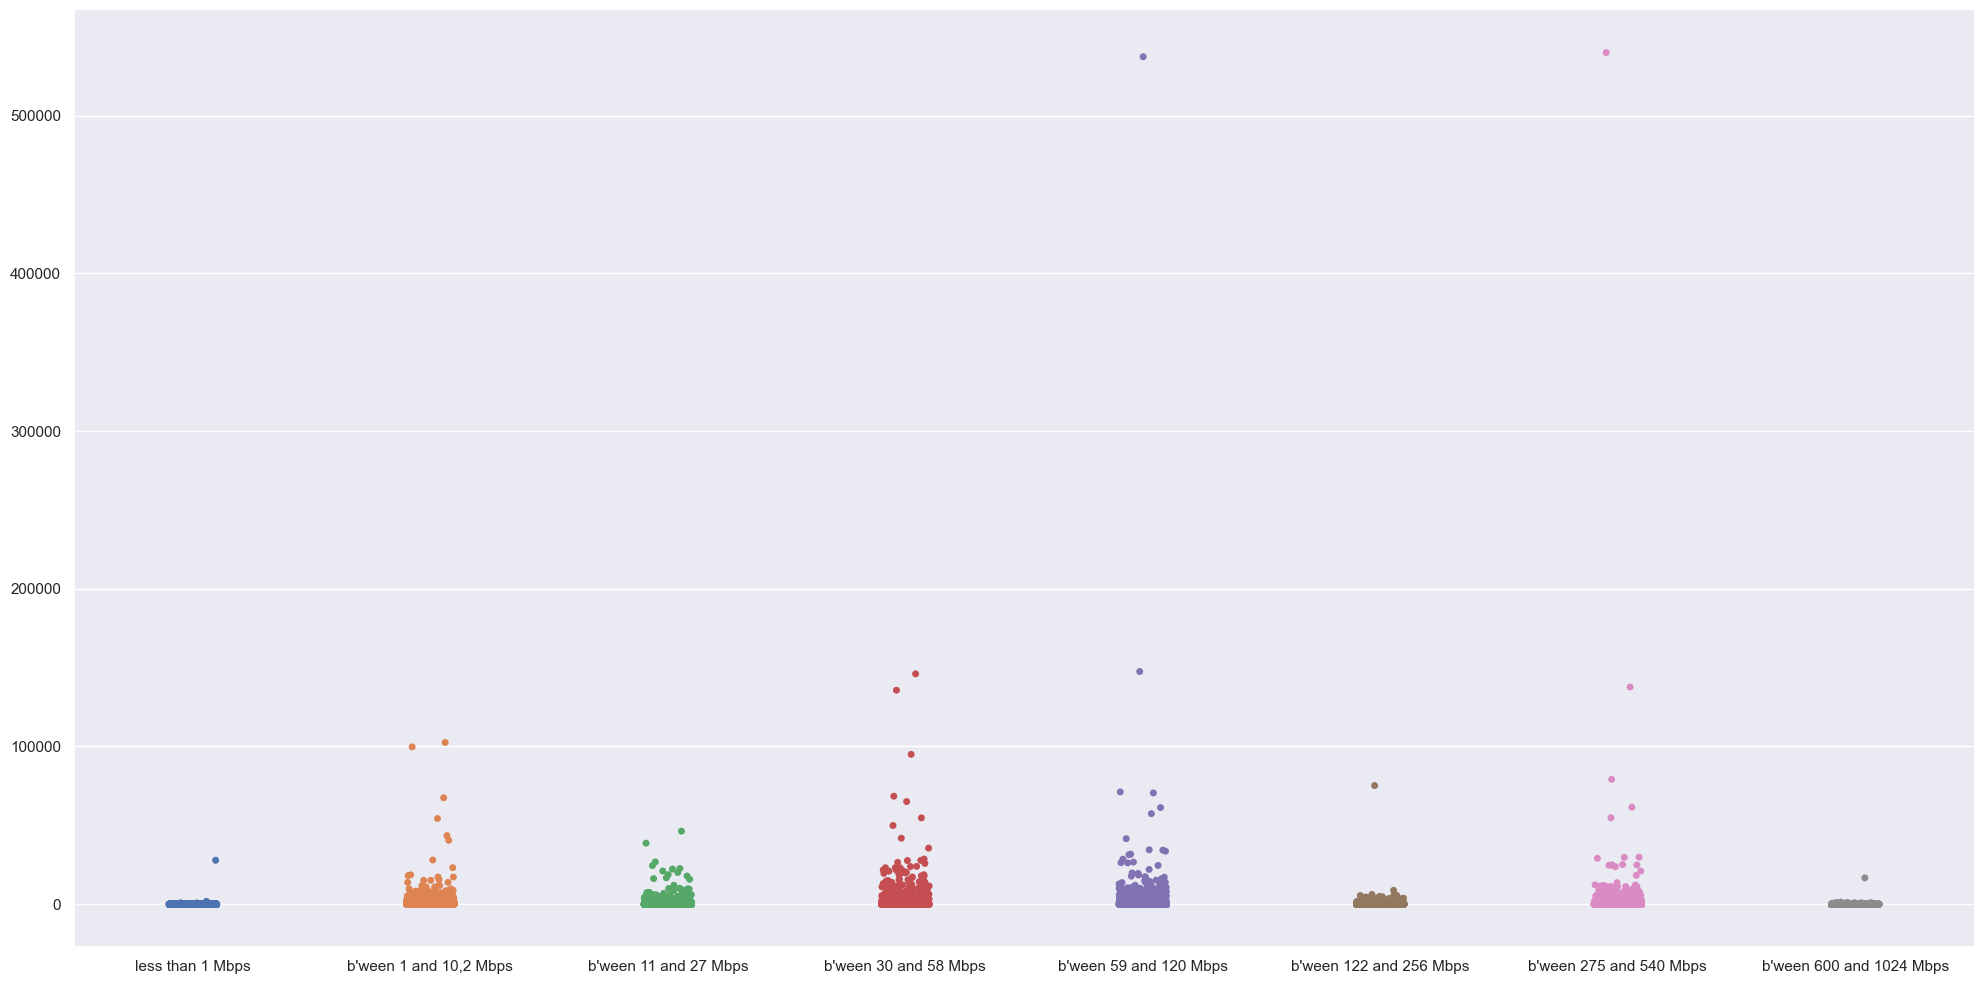

In [38]:
df = df_internet_access_by_speed_local.drop(columns=["Link Indec","Otros","Total general"])
# Crea el gráfico con el nuevo tamaño
sns.catplot(data=df, height=10, aspect=2)  # Ajusta 'height' y 'aspect' según tus necesidades

Ther is a locality that has more than 500000 conections between 59 and 120 mbps, same with 275 and 540

In [39]:
mask = (df_internet_access_by_speed_local["b'ween 59 and 120 Mbps"] > 500000) | (df_internet_access_by_speed_local["b'ween 275 and 540 Mbps"] > 500000)
df_internet_access_by_speed_local[mask]

,Provincia,Partido,Localidad,Link Indec,Otros,Total general,less than 1 Mbps,"b'ween 1 and 10,2 Mbps",b'ween 11 and 27 Mbps,b'ween 30 and 58 Mbps,b'ween 59 and 120 Mbps,b'ween 122 and 256 Mbps,b'ween 275 and 540 Mbps,b'ween 600 and 1024 Mbps
711,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,511.0,1445665.0,1823.0,99762.0,38707.0,135695.0,537285.0,75234.0,539938.0,16710.0


It's CABA, makes sense, it's the most developed locality in Argentina

We will make a new graphic without CABA to see the distribution in the rest of argentina, because there is big difference between CABA and the rest

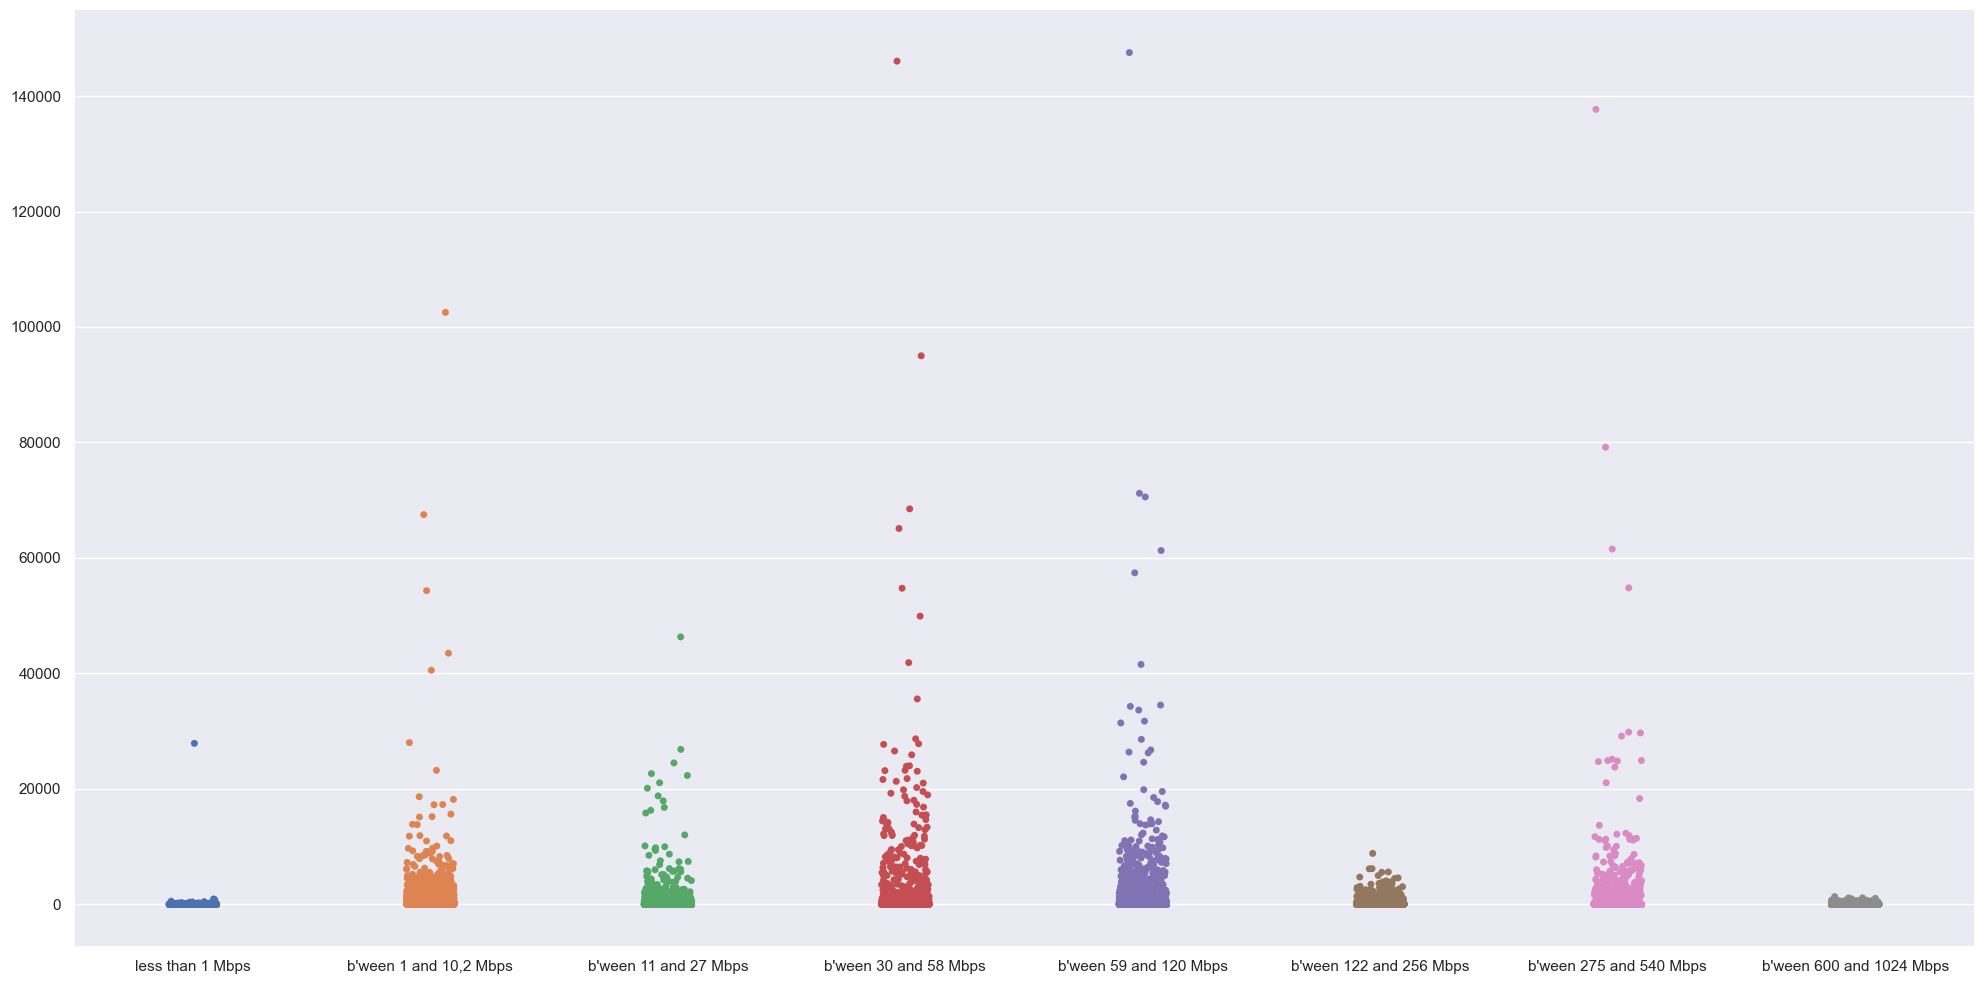

In [40]:
mask = df_internet_access_by_speed_local.Localidad != "Ciudad Autónoma de Buenos Aires"
mask = df_internet_access_by_speed_local[mask]
df = mask.drop(columns=["Link Indec","Otros","Total general"])
sns.catplot(data=df, height=10, aspect=2)  

We can see that most localities are in ranges fo 30 and 120 Mbps. Some localities have outliers that have more than 80000 conections

In [41]:
mask = (df_internet_access_by_speed_local[
    "b'ween 59 and 120 Mbps"] > 80000) | (df_internet_access_by_speed_local[
        "b'ween 275 and 540 Mbps"] > 80000) | (df_internet_access_by_speed_local[
            "b'ween 1 and 10,2 Mbps"] > 80000) | (df_internet_access_by_speed_local[
                "b'ween 30 and 58 Mbps"] > 80000)
df_internet_access_by_speed_local[mask]

,Provincia,Partido,Localidad,Link Indec,Otros,Total general,less than 1 Mbps,"b'ween 1 and 10,2 Mbps",b'ween 11 and 27 Mbps,b'ween 30 and 58 Mbps,b'ween 59 and 120 Mbps,b'ween 122 and 256 Mbps,b'ween 275 and 540 Mbps,b'ween 600 and 1024 Mbps
264,BUENOS AIRES,General Pueyrredón,Mar del Plata,6357110,16.0,246733.0,404.0,8447.0,9959.0,95007.0,71188.0,6.0,61529.0,177.0
711,CABA,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,2000010,511.0,1445665.0,1823.0,99762.0,38707.0,135695.0,537285.0,75234.0,539938.0,16710.0
953,CORDOBA,Capital,Córdoba,14014010,75.0,494126.0,53.0,43490.0,18770.0,146050.0,147530.0,17.0,137699.0,442.0
2766,SANTA FE,Rosario,Rosario,82084270,37.0,329463.0,11.0,102524.0,12006.0,65088.0,70550.0,1.0,79168.0,78.0


Again, makes sense since are the wealthiest and more populated zones of argentina 

We will save this new df in a csv:

In [42]:
df_internet_access_by_speed_local.to_csv(
    "Ultimate_Datasets/internet_access_by_speed_local.csv",index=False, encoding='utf-8')
print("The csv was saved")

The csv was saved


Let's see now the speed by province. For this one is more convinient to use the processed one from the main page:

In [43]:
df_internet_access_by_speed_province.head()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022.0,4.0,Capital Federal,106772.0,31.0,0.0,0.0,451.0,34.0,1307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022.0,4.0,Catamarca,2280.0,0.0,0.0,0.0,34.0,37.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022.0,4.0,Chaco,3909.0,0.0,225.0,111.0,234.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022.0,4.0,Chubut,20026.0,8.0,0.0,0.0,69.0,32.0,836.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
g_df_internet_access_byspeed_download1.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


We can see that it's already groupped and the unit numbers are correct, so we are using it

But we have to delete the "."

In [45]:
g_df_internet_access_byspeed_download1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


In [46]:
g_df_internet_access_byspeed_download1.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,858.000000
mean,2018.000000,2.500000,126.069829,104.202722,70.717505,78.652155,99.993059,34.439517
std,2.583484,1.118682,186.417712,211.789353,138.831868,168.570068,207.349280,133.288022
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.750000,11.000000,3.310750,5.410250,5.000000,2.091000,0.000000
50%,2018.000000,2.500000,51.000000,8.762000,20.208000,15.159000,11.042500,0.000000
75%,2020.000000,3.250000,133.250000,85.525500,61.934500,51.959500,64.286250,7.939750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,989.000000


The big difference between the median and the mean will be explain in the difference between the conections of the provinces

Only in the columns were pandas cant interprete them as a number

In [47]:
g_df_internet_access_byspeed_download1[[
    '+ 1 Mbps - 6 Mbps',"+ 30 Mbps","Total"]] = g_df_internet_access_byspeed_download1[[
        '+ 1 Mbps - 6 Mbps',"+ 30 Mbps","Total"]].astype(str)
g_df_internet_access_byspeed_download1[
    '+ 1 Mbps - 6 Mbps'] = g_df_internet_access_byspeed_download1[
        '+ 1 Mbps - 6 Mbps'].str.replace(".", "").astype(float)
g_df_internet_access_byspeed_download1[
    "+ 30 Mbps"] = g_df_internet_access_byspeed_download1[
        "+ 30 Mbps"].str.replace(".", "").astype(float)
g_df_internet_access_byspeed_download1['Total'] = g_df_internet_access_byspeed_download1[
    'Total'].str.replace(".", "").astype(float)


First we want to see total distribution by province

In [48]:
by_province = g_df_internet_access_byspeed_download1.groupby('Provincia')['Total'].sum()
by_province

Provincia
Buenos Aires           127257976.0
Capital Federal         49978286.0
Catamarca                1376845.0
Chaco                    3826652.0
Chubut                   3673618.0
Corrientes               3727094.0
Córdoba                 27312716.0
Entre Ríos               7528428.0
Formosa                  1459329.0
Jujuy                    2523333.0
La Pampa                 2923906.0
La Rioja                 1591017.0
Mendoza                  7336965.0
Misiones                 4326396.0
Neuquén                  4229182.0
Río Negro                4360057.0
Salta                    5119703.0
San Juan                 2419917.0
San Luis                 2314126.0
Santa Cruz               1281906.0
Santa Fe                24788119.0
Santiago Del Estero      2806067.0
Tierra Del Fuego         1450230.0
Tucumán                  6546843.0
Name: Total, dtype: float64

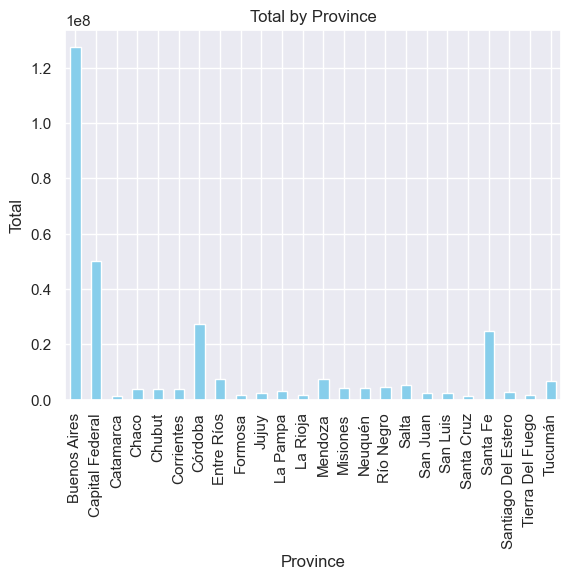

In [49]:
by_province.plot(kind='bar', color='skyblue')

plt.xlabel('Province')
plt.ylabel('Total')
plt.title('Total by Province')

plt.show()

Well, looking in the data, and continuing with what we analyzed previously, we can see a clear disparity between The 4 most developed regions and rest of the country (being Buenos Aires and CABA the places with more conections)

Let's look by quarter

In [50]:
by_quarter = g_df_internet_access_byspeed_download1.groupby('Trimestre')['Total'].sum()
by_quarter

Trimestre
1    72699956.0
2    74554480.0
3    75960800.0
4    76943475.0
Name: Total, dtype: float64

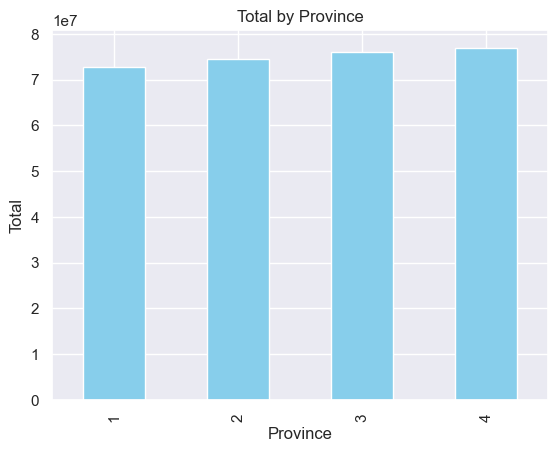

In [51]:
by_quarter.plot(kind='bar', color='skyblue')

plt.xlabel('Province')
plt.ylabel('Total')
plt.title('Total by Province')

plt.show()

All quarters are mostly balanced

Let's see the evolution in time

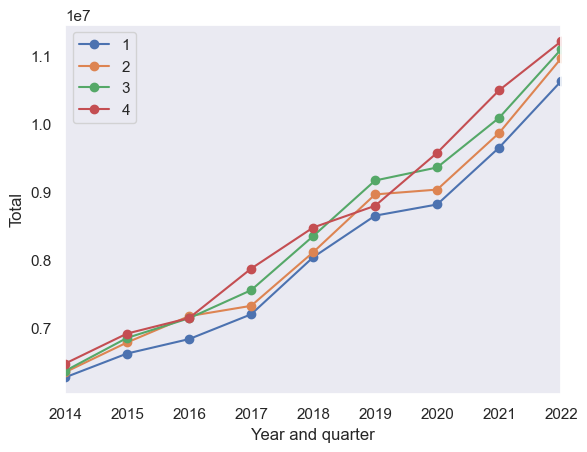

In [52]:
g_df_internet_access_byspeed_download1['Año'] = pd.to_datetime(g_df_internet_access_byspeed_download1['Año'], format='%Y')

evolution = g_df_internet_access_byspeed_download1.groupby(['Año', 'Trimestre'])['Total'].sum().unstack()

evolution.plot(marker='o')

plt.xlabel('Year and quarter')
plt.ylabel('Total')


plt.legend(loc='best')  
plt.grid()  
plt.show()

We see that the evolution is great. But it would be interesting to see by province, we will took Buenos Aires and La Rioja, for instance

In [53]:
BsAs = g_df_internet_access_byspeed_download1["Provincia"] == "Buenos Aires"
BsAs = g_df_internet_access_byspeed_download1[BsAs]
Lr = g_df_internet_access_byspeed_download1["Provincia"] == "La Rioja"
Lr = g_df_internet_access_byspeed_download1[Lr]

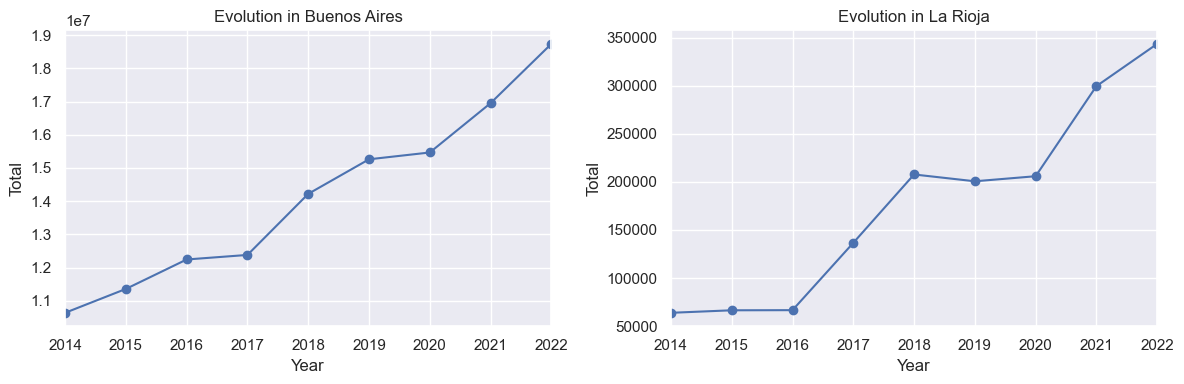

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

evolution_BsAs = BsAs.groupby('Año')['Total'].sum()
evolution_BsAs.plot(ax=axes[0], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total')
axes[0].set_title('Evolution in Buenos Aires')

evolution_Lr = Lr.groupby('Año')['Total'].sum()
evolution_Lr.plot(ax=axes[1], marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].set_title('Evolution in La Rioja')

plt.tight_layout()

plt.show()

We see a more standar and linear evolution in Buenos Aires, and a more flattened graphic in La Rioja, but in more linear in 2020, 2021 and 2022 (maybe because the pandemics and the rise of housework). 

Let's see more comparitions

In [55]:
CABA = g_df_internet_access_byspeed_download1["Provincia"] == "Capital Federal"
CABA = g_df_internet_access_byspeed_download1[CABA]
Mza = g_df_internet_access_byspeed_download1["Provincia"] == "Mendoza"
Mza = g_df_internet_access_byspeed_download1[Mza]

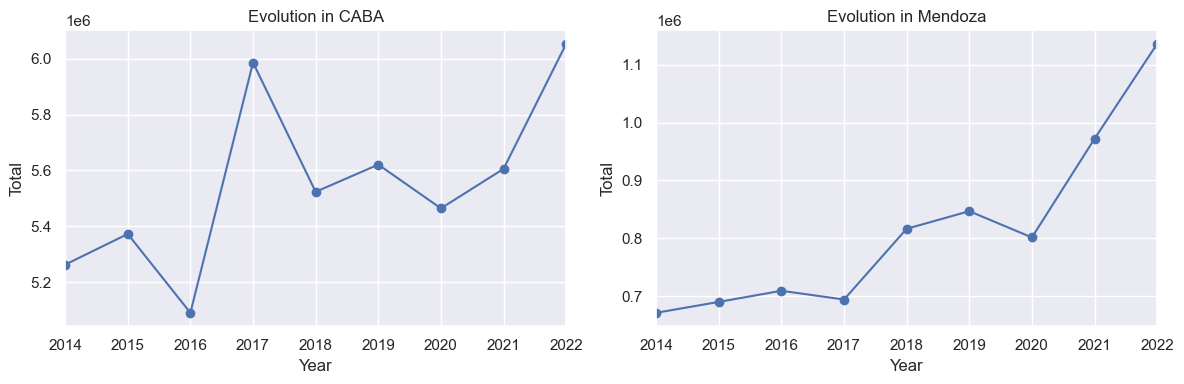

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

evolution_CABA = CABA.groupby('Año')['Total'].sum()
evolution_CABA.plot(ax=axes[0], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total')
axes[0].set_title('Evolution in CABA')

evolution_Mza = Mza.groupby('Año')['Total'].sum()
evolution_Mza.plot(ax=axes[1], marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].set_title('Evolution in Mendoza')

plt.tight_layout()

plt.show()

Well, the CABA graphic is certantly striking, because it has  a lot's of ups and dows, but since 2020 corrects to a linear graphic. The 2017 peaks was surpassed only in 2022 with an amazing grown in 2021. The Mendoza's graph is flattened with a big up in 2017 a, keeps flattened until 2020 and another big up. For the two graphs we can see the effects of the pandemics too

In [57]:
Cba = g_df_internet_access_byspeed_download1["Provincia"] == "Córdoba"
Cba = g_df_internet_access_byspeed_download1[Cba]
Sfe = g_df_internet_access_byspeed_download1["Provincia"] == "Santa Fe"
Sfe = g_df_internet_access_byspeed_download1[Sfe]

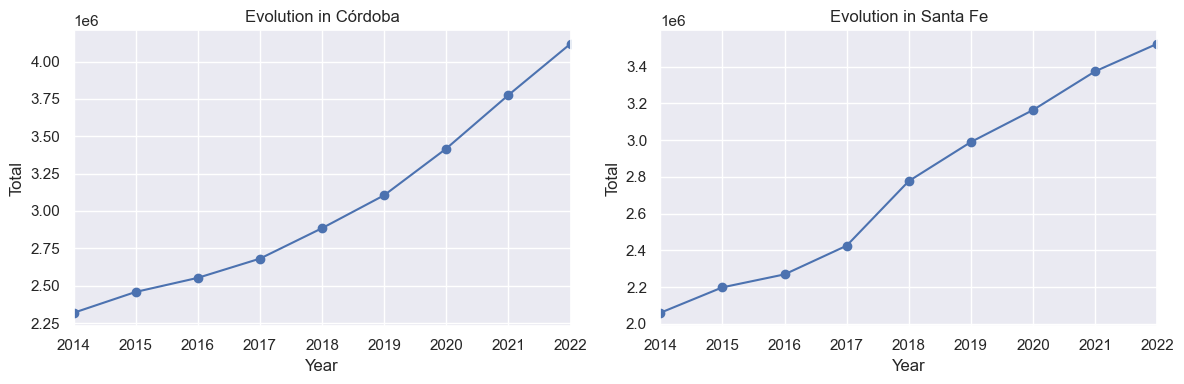

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

evolution_Cba = Cba.groupby('Año')['Total'].sum()
evolution_Cba.plot(ax=axes[0], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total')
axes[0].set_title('Evolution in Córdoba')

evolution_Sfe = Sfe.groupby('Año')['Total'].sum()
evolution_Sfe.plot(ax=axes[1], marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].set_title('Evolution in Santa Fe')

plt.tight_layout()

plt.show()

Here the two are linear, a very great evolution

As a rule, we can see that, with nuances, the provinces have a good evolution in time, but there is a big gap in terms of number of conections with the most developed provinces (4 of them, and 2 of that four with a big gap) and the rest. That's something to work with, to integrate the other regions.

We are going to focus our analysis on the province and not so in the localities (towns), since the we see that the difference has a lot to do with the provinces and that has an impact on the towns

So we are not going to take account of this kinds of dataframes, for example:

In [59]:
df_internet_access_by_tech_local.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


Now we are seeing the internet access by speed

In [60]:
df_internet_access_by_speed.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,49571.638889,239046.083333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126059.500000,8.337742e+06
std,2.618615,1.133893,52406.958667,198205.544715,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120429.285661,1.504414e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,28412.500000,74491.750000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,38879.500000,216701.500000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41184.000000,389368.250000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


In [61]:
df_internet_access_by_speed.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


<function matplotlib.pyplot.show(close=None, block=None)>

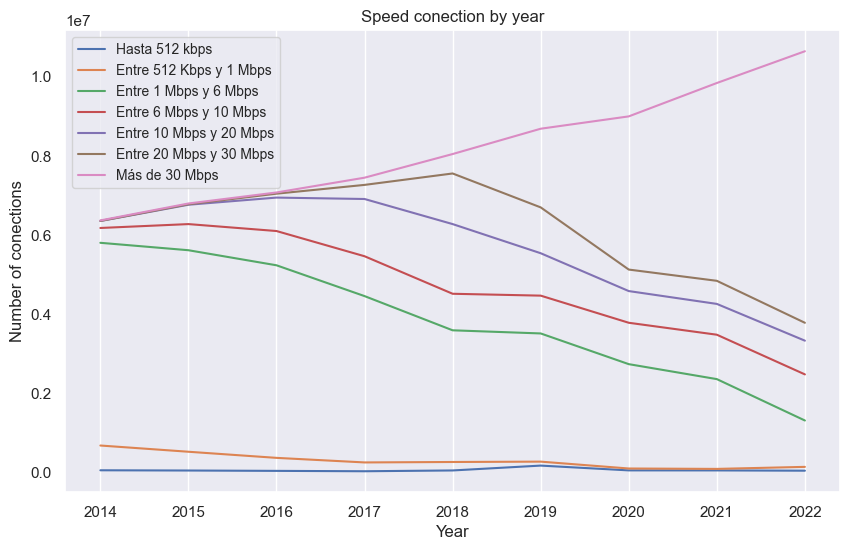

In [62]:
speed_by_year = df_internet_access_by_speed.groupby('Año')[[
    'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 
    'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']].mean()

speed_by_year.plot(kind='line', stacked=True, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of conections')
plt.title('Speed conection by year')

plt.legend(title='speed')
plt.legend(loc='upper left', fontsize='small')
plt.grid(axis='y')
plt.show

We see a continuous upgrade in the speed conection

In [63]:
df_internet_access_by_speed["Mean speed"] = df_internet_access_by_speed[[
    'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 
    'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 
    'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']].mean(axis = 1)

Text(0.5, 1.0, 'Mean Speed Evolution')

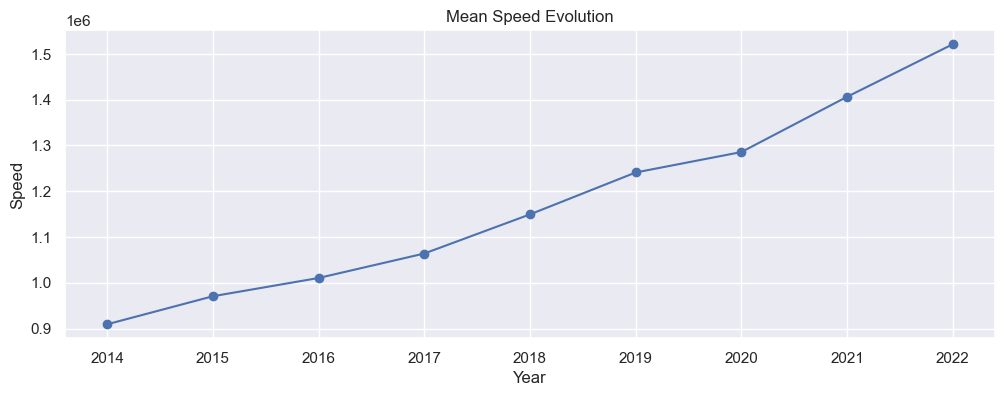

In [64]:
fig, axes = plt.subplots(figsize=(12, 4))

evolution_year = df_internet_access_by_speed.groupby('Año')['Mean speed'].mean()
evolution_year.plot (marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('Speed')
axes.set_title('Mean Speed Evolution')

The mean speed has a linear evolution

We save the data frame with the new column to use it in the display

In [121]:
df_internet_access_by_speed.to_csv(
    "Ultimate_Datasets/internet_access_by_speed.csv",index=False, encoding='utf-8')
print("The csv was saved")

The csv was saved


In [65]:
df_internet_access_by_tech.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [66]:
df_internet_access_by_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


In [67]:
df_internet_access_by_tech

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
5,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021
6,2021,2,2018587,5641731,1472246,476968,253552,9863084,Abr-Jun 2021
7,2021,1,2175211,5424782,1362976,434548,250455,9647972,Ene-Mar 2021
8,2020,4,2213949,5371824,1311199,421554,253036,9571562,Oct-Dic 2020
9,2020,3,2263889,5259351,1170879,413259,248821,9356199,Jul-Sept 2020


Let's see the distribution

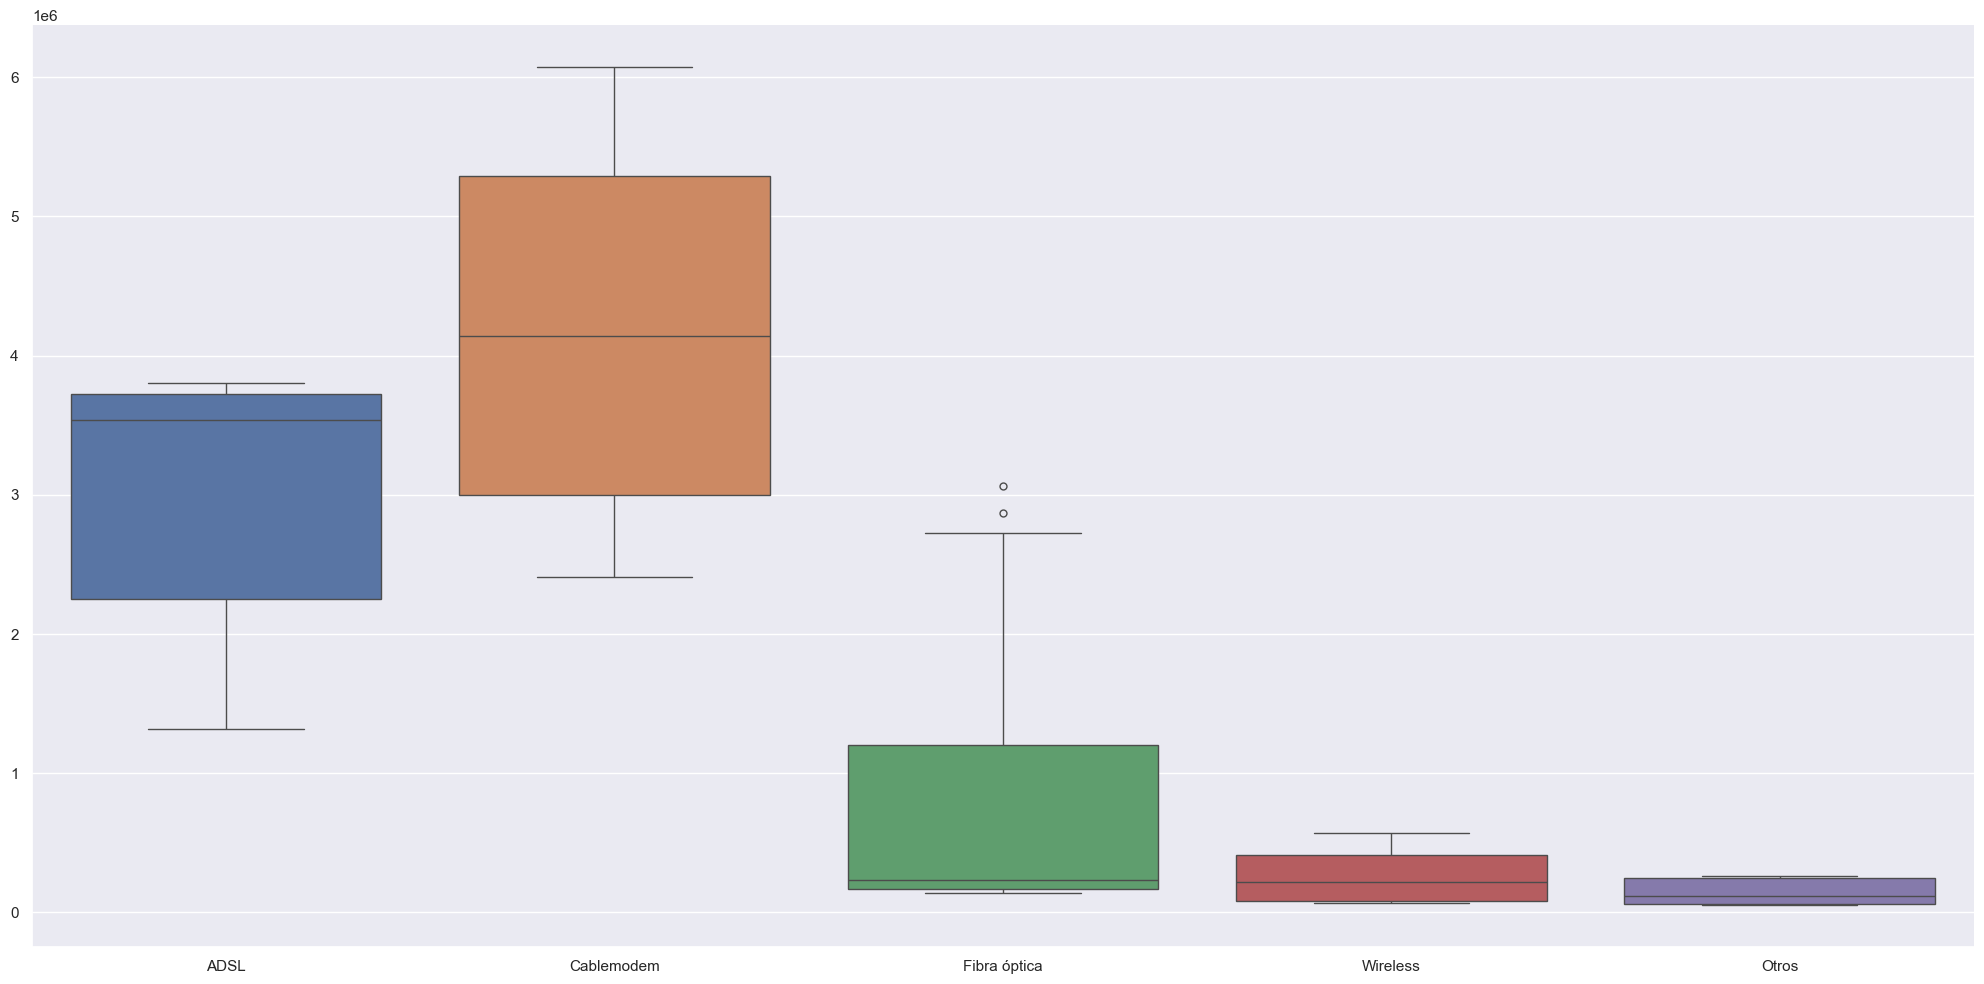

In [68]:
df = df_internet_access_by_tech.drop(columns=["Año","Trimestre","Total"])
sns.catplot(data=df, kind="box",height=10, aspect=2)  

We see two outliers on Fibra optica, which are the last two years (good sign)

<function matplotlib.pyplot.show(close=None, block=None)>

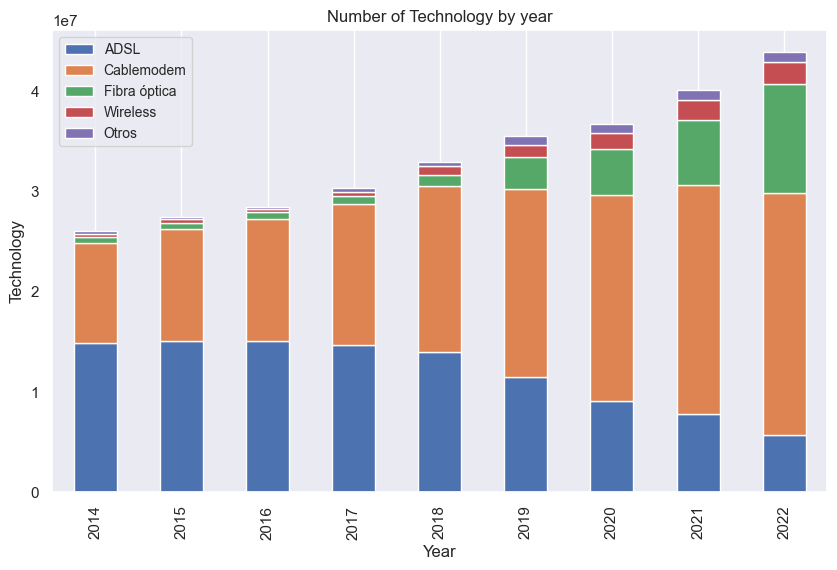

In [69]:
by_year = df_internet_access_by_tech.groupby("Año")[["ADSL","Cablemodem","Fibra óptica", "Wireless", "Otros"]].sum()

by_year.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Technology')
plt.title('Number of Technology by year')

plt.legend(title='technology')
plt.legend(loc='upper left', fontsize='small')
plt.grid(axis='y')
plt.show

We see an upgrade in technology, year by year

In [90]:
df_internet_BAF.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


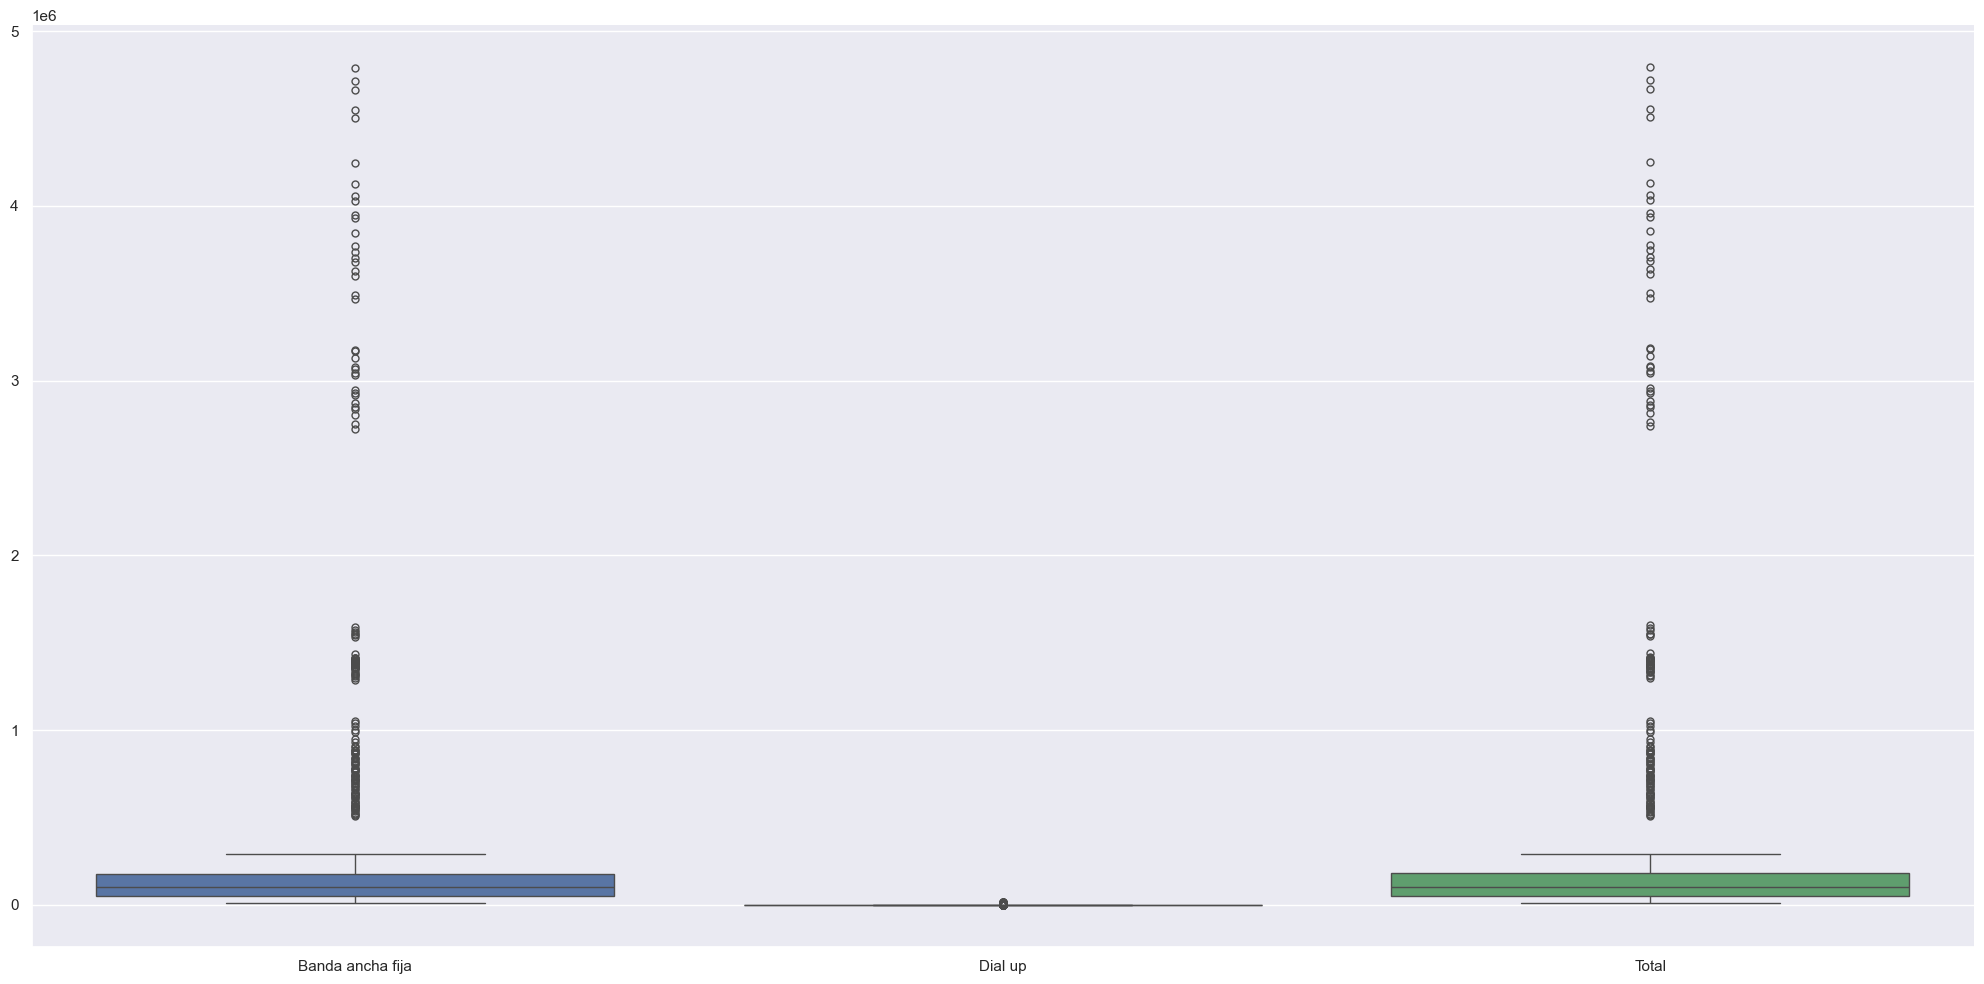

In [88]:
df = df_internet_BAF.drop(columns=["Provincia","Año","Trimestre"])
sns.catplot(data=df, kind="box",height=10, aspect=2)  

We see a lot of outliers

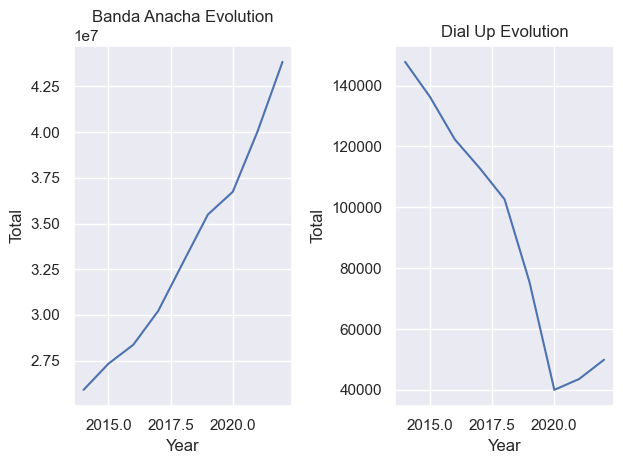

In [87]:
fig, axes = plt.subplots(1, 2)

by_year_Ba = df_internet_BAF.groupby("Año")["Banda ancha fija"].sum()
by_year_Ba.plot( ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total')
axes[0].set_title('Banda Anacha Evolution')

by_year_DU = df_internet_BAF.groupby('Año')['Dial up'].sum()
by_year_DU.plot( ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].set_title('Dial Up Evolution')

plt.tight_layout()
plt.show()

We see an increase in the number of banda ancha (broadband) users and a disminution of dial up until 2020, but an increase since that year.

In [92]:
df_internet_gains

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021
5,2021,3,4.299994e+07,Jul-Sept 2021
6,2021,2,3.823967e+07,Abr-Jun 2021
7,2021,1,3.667637e+07,Ene-Mar 2021
8,2020,4,3.353970e+07,Oct-Dic 2020
9,2020,3,3.199744e+07,Jul-Sept 2020


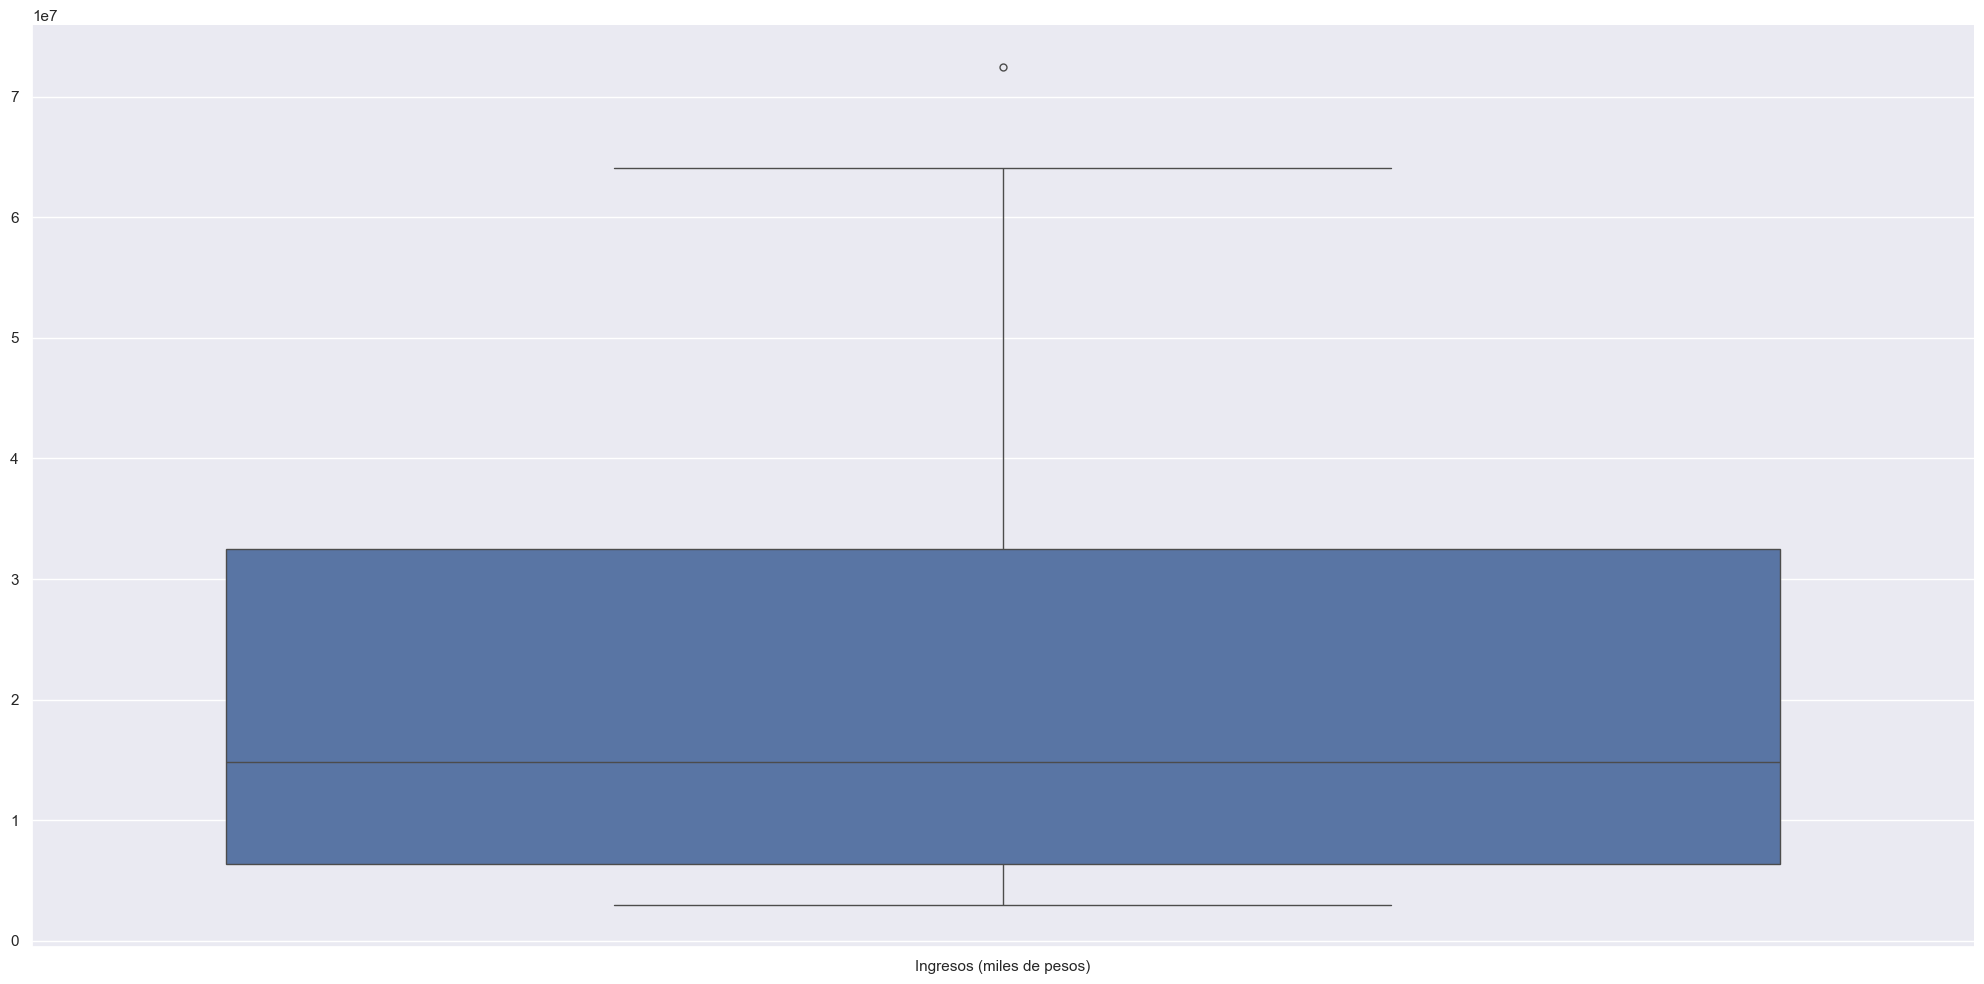

In [94]:
df = df_internet_gains.drop(columns=["Año","Trimestre","Periodo"])
sns.catplot(data=df, kind="box",height=10, aspect=2)  

In [96]:
maxim = df_internet_gains["Ingresos (miles de pesos)"] == df_internet_gains["Ingresos (miles de pesos)"].max()
df_internet_gains[maxim]

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022


We see only one outlier, and it's the last month that apears in the dataframe. This is because the inflation. It doesnt make sense really to look at this dataframe, since it's not adjusted by inflation, we wont have a real aswer if we the profits increased or not (since argentina has a ridiculous inflation number)

In [98]:
df_internet_penetration.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.72
1,2022,4,Capital Federal,50.35
2,2022,4,Catamarca,16.73
3,2022,4,Chaco,11.66
4,2022,4,Chubut,26.23


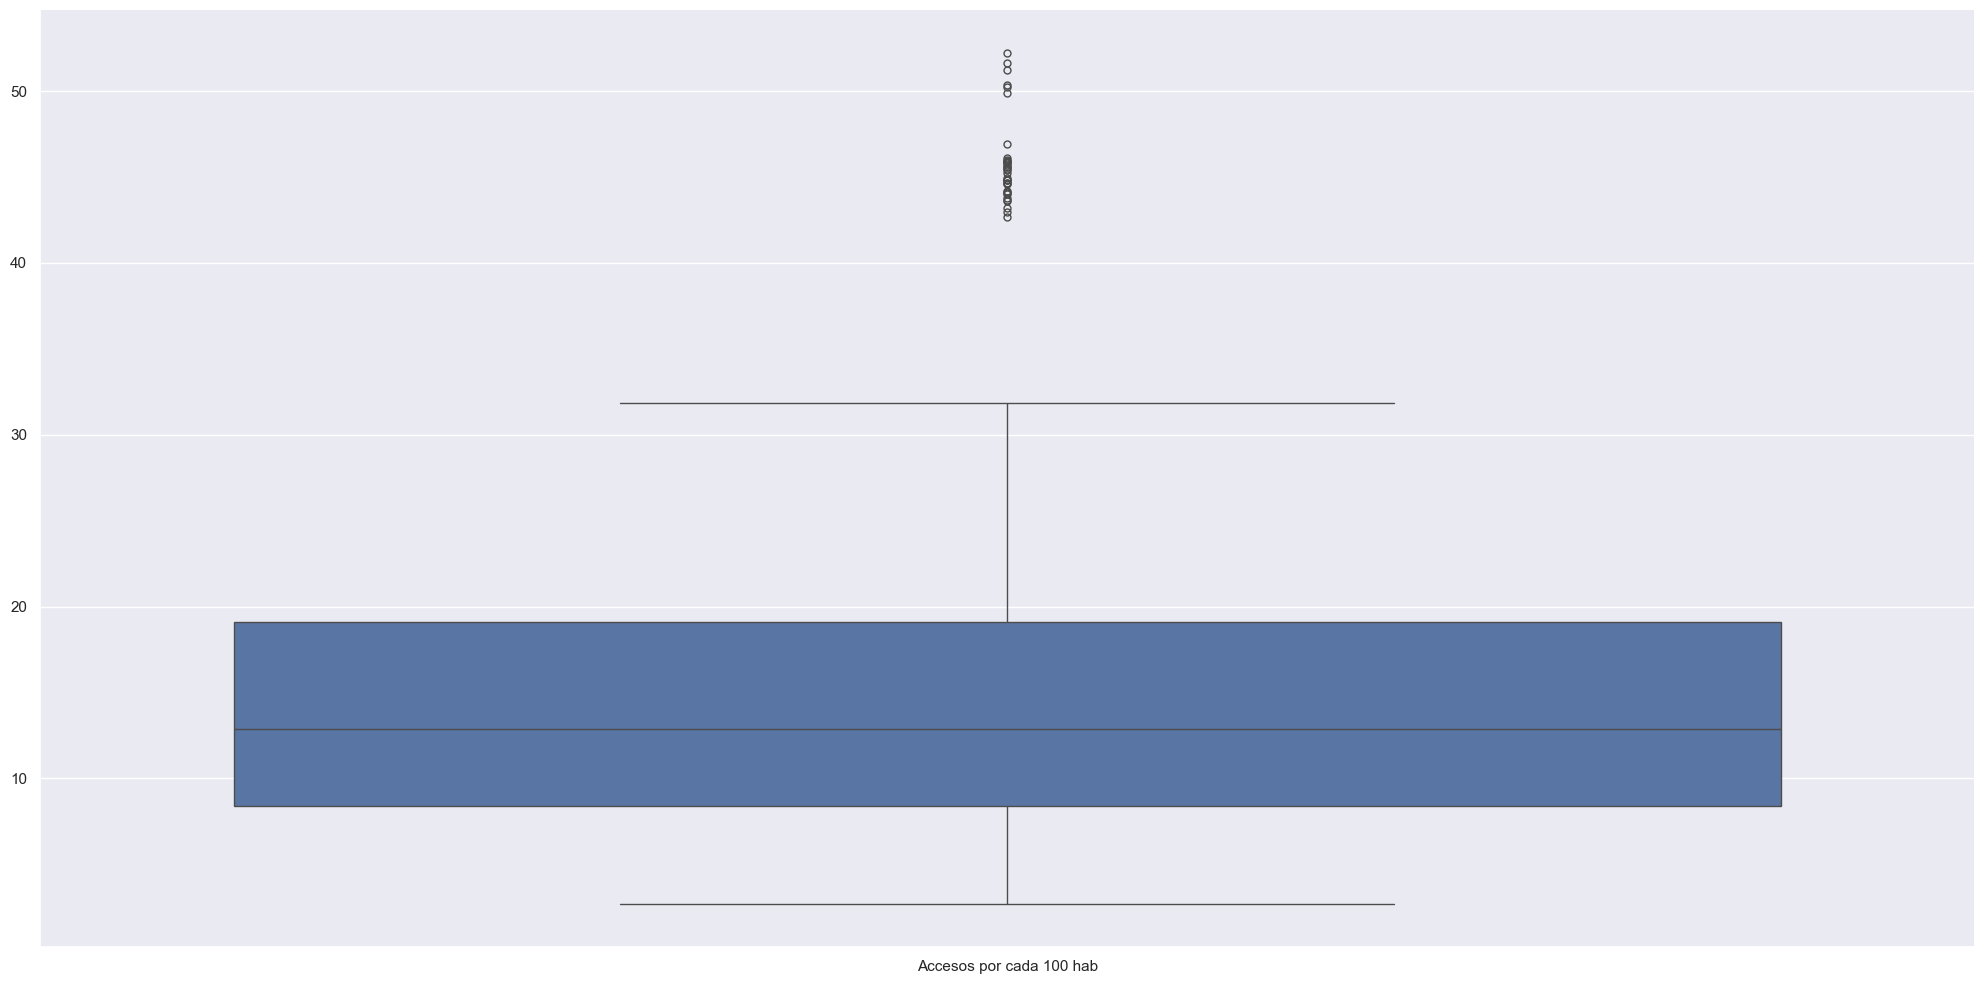

In [99]:
df = df_internet_penetration.drop(columns=["Año","Trimestre","Provincia"])
sns.catplot(data=df, kind="box",height=10, aspect=2)  

In [100]:
outliers = df_internet_penetration["Accesos por cada 100 hab"] > 40
df_internet_penetration[outliers]

,Año,Trimestre,Provincia,Accesos por cada 100 hab
1,2022,4,Capital Federal,50.350000
25,2022,3,Capital Federal,50.220000
49,2022,2,Capital Federal,49.873561
73,2022,1,Capital Federal,46.014348
97,2021,4,Capital Federal,45.848511
121,2021,3,Capital Federal,45.900383
145,2021,2,Capital Federal,45.487190
169,2021,1,Capital Federal,44.826990
193,2020,4,Capital Federal,44.833968
217,2020,3,Capital Federal,44.622743


All the outliers are from CABA. Again, the difference between CABA and rest are very big, like we saw all along the EDA

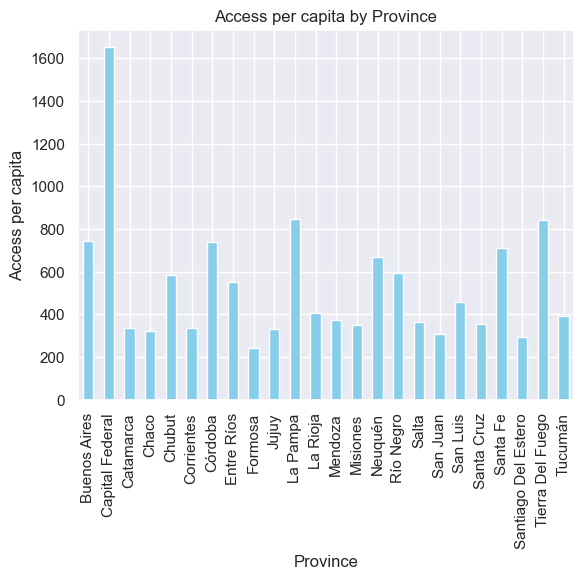

In [102]:
by_province = df_internet_penetration.groupby("Provincia")["Accesos por cada 100 hab"].sum()
by_province.plot(kind='bar', color='skyblue')

plt.xlabel('Province')
plt.ylabel('Access per capita')
plt.title('Access per capita by Province')

plt.show()


This is the best graphic to see where the people have more access, since it's per capita. We see, of course, a big gap between CABA and the rest, but La pampa and Tierra del fuego are the next one. We can asume that the big number of access of Buenos Aires was due to it's big population but not because of this development.

Let's do some comparitions

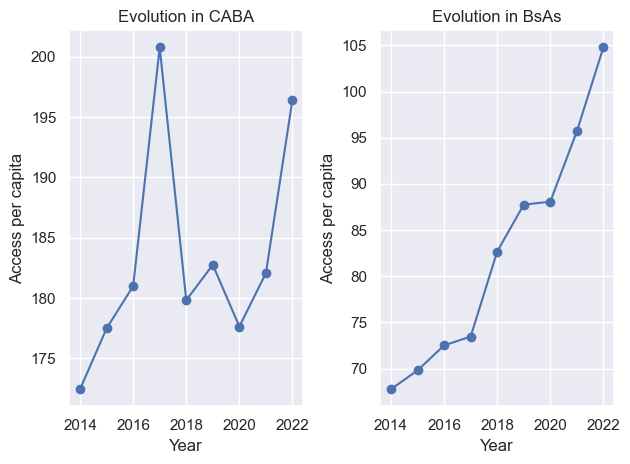

In [114]:
CABA = df_internet_penetration["Provincia"] == "Capital Federal"
CABA = df_internet_penetration[CABA]
CABA = CABA.groupby("Año")["Accesos por cada 100 hab"].sum()

BsAs = df_internet_penetration["Provincia"] == "Buenos Aires"
BsAs = df_internet_penetration[BsAs]
BsAs = BsAs.groupby("Año")["Accesos por cada 100 hab"].sum()

fig, axes = plt.subplots(1, 2)
CABA.plot(ax=axes[0], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Access per capita')
axes[0].set_title('Evolution in CABA')


BsAs.plot(ax=axes[1], marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Access per capita')
axes[1].set_title('Evolution in BsAs')

plt.tight_layout()

plt.show()

The access higher in CABA but the curve is more linear on Buenos Aires. Caba has a big down on 2017, on the other hand Buenos Aires is always going up. 

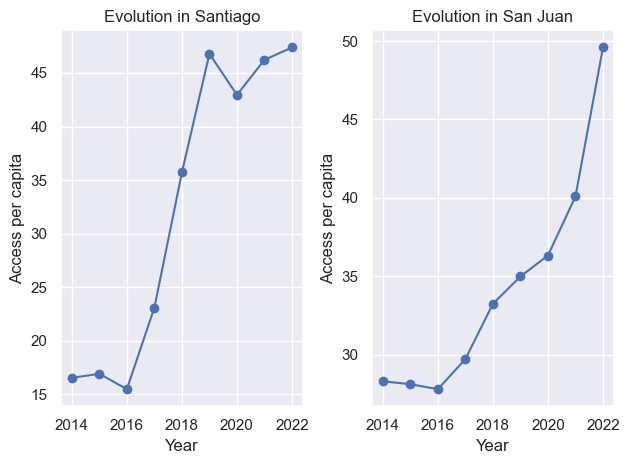

In [117]:
Santiago = df_internet_penetration["Provincia"] == "Santiago Del Estero"
Santiago = df_internet_penetration[Santiago]
Santiago = Santiago.groupby("Año")["Accesos por cada 100 hab"].sum()

San_juan = df_internet_penetration["Provincia"] == "San Juan"
San_juan = df_internet_penetration[San_juan]
San_juan = San_juan.groupby("Año")["Accesos por cada 100 hab"].sum()

fig, axes = plt.subplots(1, 2)
Santiago.plot(ax=axes[0], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Access per capita')
axes[0].set_title('Evolution in Santiago')


San_juan.plot(ax=axes[1], marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Access per capita')
axes[1].set_title('Evolution in San Juan')

plt.tight_layout()

plt.show()

To 2016 to 2019 Santiago has an amazing evolution, but then it got watertight. Similar case to San Juan, but since 2016 it always got up.

In [119]:
df_internet_speed_hist.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


We already did a graphic to the Mbps by Province, so we are not going to repeat our selves